![Header](img/header_1.jpg)

# Binaural Synthesis

Humans are able to localize sound events with regard to their perceived distance as well as their angular position in space. Sound waves are altered due to reflections, diffrection, and resonances caused by the precense of a humans body, that is head, shoulders, torso, as well as the fine structure of the ear formed by pinna, cavum conchae, etc. All these effects, which in its assembly are evaluated by the human brain to localize a source or to get other spatial information, are integrated in binaural signal. If the binaural signal is reproduced perfectly at the ear drums (the human’s microphones), there is no chance to distinguish the virtual source or environment from the real sound field. With binaural synthesis, a filtering approach with special filters, an acoustic sound source represented by a mono-signal can virtually be placed at arbitrary positions in space.

In this lab, the basics of binaural synthesis are introduced in an explorative fashion. The aim is to familiarize with the structure of HRIR datasets, to understand the difference between interaural time difference (ITD) and interaural level difference (ILD), and finally to evaluate a first static binaural synthesis of two monaural input signals.

---
## 1. Head-related transfer functions

A valid way to describe all linear sound transformations caused by torso, head and pinna is the use of so called “head-related transfer functions” (HRTFs). For each direction of sound incidence from a sound source to a human receiver there exist two transfer functions (one for the left and one for the right ear), which are combined into a two-channel HRTF in frequency domain. The combination of all directions into a single database is commonly called an HRTF dataset.

For the description of the direction of sound incidence, a spherical head-related coordinate system is used (see Figure, left). The origin of this coordinate system is in the center of the head, at the center between the connecting line of the ear canals. There are two angles $\vartheta$ and $\varphi$ describing the direction of incidence. The azimuth angle 𝜑 rotates counterclockwise (righthanded) between 0° (front direction) and 360° (again front direction) on the horizontal plane.
The elevation angle $\vartheta$ is defined from -90° (bottom) to 90° (top). The angle-pair ($\varphi$, $\vartheta$) = (0°, 0°) denotes sound coming from front, ($\varphi$, $\vartheta$) = (90°, 0°) from left and ($\varphi$, $\vartheta$) = (0°, 90°) from top. Three planes are defined: The horizontal plane ($\vartheta$ = 0°), median plane ($\varphi$ = 0°, 180°) and frontal plane ($\varphi$ = ±90°).

<img src="img/pti_binaural_synthesis_xyz.png" width="800" height="400">

In the right hand side diagram of the Figure the sound paths from a source to each ear canal are shown. The sound generated by the source – the source signal – is described by $s(t, \varphi, \vartheta)$. The impulse responses (time domain) from source to each ear are denoted as $h_L(t, \varphi, \vartheta)$and $h_R(t, \varphi, \vartheta)$.
Together, the impulse responses $h_L(t, \varphi, \vartheta)$and $h_R(t, \varphi, \vartheta)$. build one head-related impulse response (HRIR). By using the Fourier-Transformation, the complex transfer functions $H_L(f, \varphi, \vartheta)$ and $H_R(f, \varphi, \vartheta)$. are obtained from the time domain representations, which form the head-related transfer function


### Task 1.1: Loading a HRTF dataset into the workspace
A HRIR dataset contains the head-related transfer functions, recorded for many discrete directions. The goal  is to simulate two static sound sources from only two directions. The first task is to extract the correct HRIR pairs for both ears from the dataset. 
The provided dataset `hrir/ITA_Artificial_Head_5x5_44100Hz.sofa` is stored as a SOFA file (Spatially Oriented Format for Acoustics). SOFA enables to store spatially oriented acoustic data like HRIRs. It has been standardized by the Audio Engineering Society (AES) as AES69-2015.

Firstly, a HRIR dataset is loaded into the workspace. You might have a quick look at the documentation of `python-sofa` ([Python-sofa Documentation](https://python-sofa.readthedocs.io/en/latest/)) to get familar with handling sofa files. The HRIR dataset `finishedHRTF_5deg.sofa` is stored in the variable `HRIR_dataset`.

**Important: Always execute all cells in consecutive order, starting at the top of the notebook**

*Note: You are not supposed do do any implementation here.*

In [2]:
import sofa
HRIR_path = "hrir/ITA_Artificial_Head_5x5_44100Hz.sofa"
HRIR_dataset = sofa.Database.open(HRIR_path)

### Task 1.2: Source positions and head orientations
In order to get familar with the discrete positions in the dataset, plot the emitter positions `source_positions` of all HRIRs by executing the cell below.

The listener's position, the view and up-vector are stored in the variables `listener_position`, `listener_view` and `listener_up`.

If you are not already familar with `matplotlib`, which is a library for creating visualizations in Python, you may check out the usage guide: [Matplotlib Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

*Note: You are not supposed do do any implementation here.*

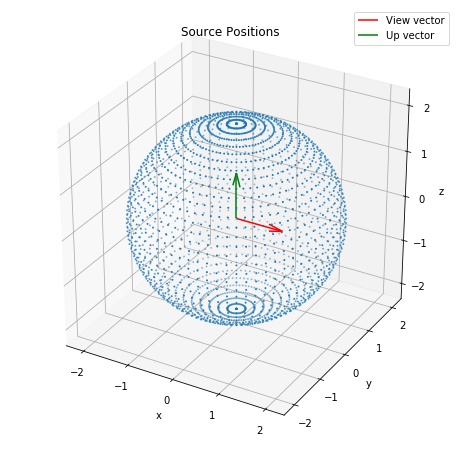

In [3]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D

# extract the respective positions from the HRIR dataset:
source_positions = HRIR_dataset.Source.Position.get_values(system="cartesian")
listener_position = np.squeeze(HRIR_dataset.Listener.Position.get_values(system="cartesian"))
listener_up = np.squeeze(HRIR_dataset.Listener.Up.get_values(system="cartesian"))
listener_view = np.squeeze(HRIR_dataset.Listener.View.get_values(system="cartesian"))

# plot source positions:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(source_positions[:, 0], source_positions[:, 1], source_positions[:, 2], s=1)

ax.quiver(listener_position[0], listener_position[1], listener_position[2],
           listener_view[0], listener_view[1], listener_view[2],
           color='red', label='View vector')

ax.quiver(listener_position[0], listener_position[1], listener_position[2],
           listener_up[0], listener_up[1], listener_up[2],
           color='green', label='Up vector')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Source Positions')
ax.legend();

### Task 1.3: Interpreting the plot

How is the HRTF dataset oriented and in which direction is the listener looking? In which directions are the ears oriented?

In [4]:
# Write down your answer here:

# 1) ...
# 2) ...

---
## Interaural level difference (ILD) and interaural time difference (ITD)

The primary mechanism used by humans to localize sound are the _interaural time difference_ (ITD) and the _interaural level difference_ (ILD), which descibe the time of arrival difference and the sound pressure level difference between the two ear signals for a single sound event. The auditory cortex primarily relies on the ITD for the low frequency range, while the ILD is primarily evaluated for high frequencies. It is generally assumed that the transition between the two is found at approximately 1.5 kHz. This is also referred to as the _duplex theory_.

### Interaural time difference

The ITD can be calculated as the time-delay for which the cross-correlation of the left and right channel of the HRIR becomes maximal. In order to achieve precise results, it is required to apply a low-pass to the HRIR before calculating the ITD.
This can be written as

$$ \mathrm{ITD} = |\mathrm{\underset{t}{\operatorname{argmax}}}~\mathrm{corr}\left(h_{L, lp}(t, \varphi, \vartheta), h_{R,lp}(t, \varphi, \vartheta)\right)|.$$

### Interaural level difference

The ILD is strongly frequency-dependent. To get precise information, the level difference must be defined for narrow bands of the HRTF in frequency domain. For an approximate single ILD value, the broadband ear signals can be used

$$ \mathrm{ILD} = 10 \log_{10} \left( \frac{\int h_{R}(t, \varphi, \vartheta) \mathrm{d}t}{\int h_{L}(t, \varphi, \vartheta)\mathrm{d}t} \right) = 10 \log_{10} \left( \frac{\int H_{R}(f, \varphi, \vartheta) \mathrm{d}f}{\int H_{L}(f, \varphi, \vartheta)\mathrm{d}f} \right).$$



---  
The following tasks . The module `helper_functions` provides some helpful functions for the upcoming tasks.

### Task 2.1: Calculating the ITD analytically

Sound waves propagate with approximately $c = 343$ m/s.
Calculate the ITD of a sound source located left, $(\varphi, \vartheta) = (90^\circ, 0^\circ)$, of a listener with a very spherical head. Assume that the sound wave cannot propagate throught the listeners head, but instead is diffracted on an arc around the listers head. The arc has a diameter corresponding to the listeners head.

In [18]:
c = 343 # Speed of sound in m/s
d = 15e-2 # Head diameter in m

###### ! Solution begins here ! ######

ITD_analytic = 

###### ! Solution ends here ! ######
print(f"ITD = {ITD_analytic*1e3} ms")

SyntaxError: invalid syntax (1351616282.py, line 6)

### Task 2.2: Calculating the ILD and ITD from the HRIR
1. Select a HRIR from the dataset and print its ILD and ITD. Complete the below cell and use the provided function `hf.get_HRIR_at_direction(HRIR_dataset, azimuth, elevation)`.

In [5]:
# import modules
import helper_functions as hf

# extract the sampling rate from the dataset:
sampling_rate = HRIR_dataset.Data.SamplingRate.get_values(indices={"M":0})

# define the direction to plot the HRIR for:
azimuth = 90
elevation = 0

###### ! Solution begins here ! ######
HRIR = hf.get_HRIR_at_direction(HRIR_dataset, azimuth, elevation)


2. Familiarize yourself with the format and shape of the array, the HRIR is stored in. You can use the array method `shape`. For information on numpy arrays, refer to the numpy quickstart guide found at: https://numpy.org/doc/stable/user/quickstart.html

In [6]:
###### ! Use this cell for the task ! ######


2. Implement the prepared function `get_ITD(HRIR)`. For this, you might check section 2.3 in the script or the section on the ITD above. Think of a meaningful cut-off frequency for the low pass filter. You can use the scipy functions `signal.correlate` to calculate the cross-correlation and the numpy function `np.argmax()` to find the argument (index) for which the input reaches it's maximum. Low-pass filtering is available in the scipy functions `signal.butter` and `signal.sosfilt` or `signal.lfilter` (depending on the output you chose for `signal.butter`. For further inforation refer to the [scipy.signal documentation](https://docs.scipy.org/doc/scipy/reference/signal.html).

3. Implement the prepared function `get_ILD(HRIR)`. Again, section 2.3 in the script contains more detailled information on the calculation. Assume that for a discrete signal, the integration can be approximated as a summation.

4. Finally, the ILD is printed in milliseconds and ITD in decibels. Compare the resulting ITD with your analytical solution in order to check if your implementation is valid.

In [7]:
from scipy import signal 
def get_ITD(HRIR, sampling_rate=44100):
    """
    Get the interaural time difference (ITD) for a specified HRIR.

    Parameters
    ----------
    HRIR : numpy.ndarray
        The HRIR for a single direction.
    sampling_rate : integer
        The sampling rate of the HRIR.

    Returns
    -------
    ITD : double
        The interaural time difference (ILD).
    """
###### ! Solution begins here ! ######

    # Get the time vector and the HRIR for the given direction:
    n_samples = HRIR.shape[-1]
    # t = ...
    
    # correlation = ...

    # Calculate the ITD
    # ITD = ...
    
###### ! Solution ends here ! ######
    sos = signal.butter(10, 1.5e3, btype='low', output='sos', fs=sampling_rate)
    HRIR = signal.sosfilt(sos, HRIR)
    n_samples = HRIR.shape[-1]
    t = np.arange(0, n_samples)/sampling_rate
    corr = signal.correlate(HRIR[1], HRIR[0])
    corr_lags = np.arange(-n_samples + 1, n_samples)/sampling_rate
    
    ITD = np.abs(corr_lags[np.argmax(np.abs(corr))])

    return ITD

def get_ILD(HRIR):
    """
    Get the interaural level difference (ILD) for a specified HRIR.

    Parameters
    ----------
    HRIR : numpy.ndarray
        The HRIR for a single direction.

    Returns
    -------
    ILD : double
        The interaural level difference (ILD).
    """
###### ! Solution begins here ! ######

    # Calculate the integrals for each channel:
    # Hint: Assume that the integration can be approximated using
    # a summation.

    # left =  
    # right = 
    
    # Calculate the ILD
    
    # ILD = 
    
###### ! Solution ends here ! ######
    return 0


ITD = get_ITD(HRIR)
ILD = get_ILD(HRIR)

print('ITD: ' + str(np.round(ITD,5)*1000) + ' ms')
print('ILD: ' + str(np.round(ILD,2)) + ' dB')


ITD: 0.7 ms
ILD: 0 dB


### Task 2.3 Visualization of ILD and ITD

Plot the HRIR from the dataset while visualizing its ILD and ITD using the function `hf.plot_HRIR(HRIR, ILD, ITD, sampling_rate)`. Use the previously implemented functions for the calculation of the ITD and ILD. 

In [8]:
###### ! Solution begins here ! ######


###### ! Solution ends here ! ######

### Task 2.4: Interaural time difference vs. azimuth/elevation
Compare the HRIRs for different azimuth angles using the provided Jupyter widget. Move the slider to look at different azimuth and elevation angles.

What do you observe? Please write down in the cell below, how the ITD and ILD are affected by different incident angles.

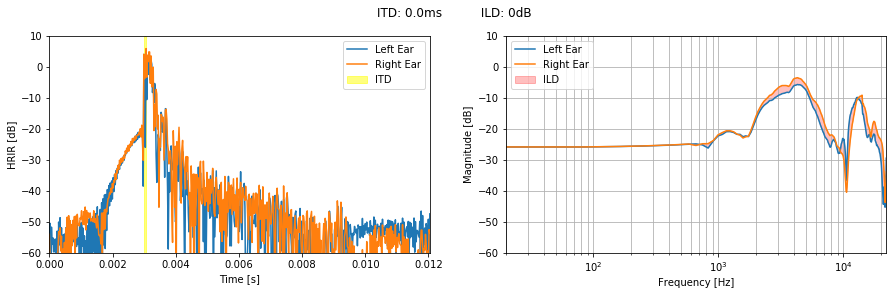

In [9]:
import ipywidgets

slider_azimuth = ipywidgets.IntSlider(value=0, min=-90, max=90, step=5,
                                      description='Azimuth', continuous_update=False)

slider_elevation = ipywidgets.IntSlider(value=0, min=-90, max=90, step=5,
                                        description='Elevation', continuous_update=False)

interactive_panel = ipywidgets.interact(hf.plot_HRIR_at_direction,
                                        HRIR_dataset=ipywidgets.fixed(HRIR_dataset),
                                        ILD_function = ipywidgets.fixed(get_ILD),
                                        ITD_function = ipywidgets.fixed(get_ITD),
                                        azimuth=slider_azimuth,
                                        elevation=slider_elevation)



In [10]:
# Write down your answer here:

# ...

### Task 2.5: Interaural time difference vs. azimuth
---
In order to summarize the observations, plot the ITD in dependence on the azimuth angle. Complete the code in the cell below based on the results from task 2.1 and the functions from task 2.2.
1. Extend the analytic ITD calculation for a spherical head, as described in task 2.1, to a full array of azimuth angles from $-90^\circ$ to $+90^\circ$. _Hint: Use trigonometric functions to calculate the arc segments._
2. Calculate the ITD from the HRIR for the same set of azimuth angles.
3. Compare both azimuth angle dependent results. Where are they different and why?

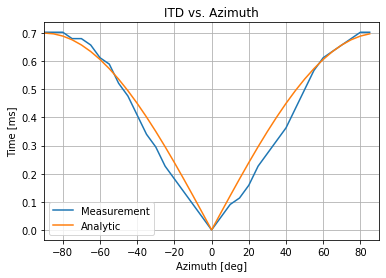

In [20]:
azimuth_angles = np.arange(-90,90,5)

###### ! Solution begins here ! ######

ITD = np.zeros(len(azimuth_angles))

ITD_analytic_circle = np.abs(np.sin(np.deg2rad(azimuth_angles))*0.7)

for idx, azi_angle in enumerate(azimuth_angles):
    # ... 
    HRIR = hf.get_HRIR_at_direction(HRIR_dataset, azi_angle, elevation)
    ITD[idx] = get_ITD(HRIR)

    
    
###### ! Solution ends here ! ######

# convert to milliseconds:
ITD = ITD * 1000

fig, ax = plt.subplots()
ax.plot(azimuth_angles, ITD, label='Measurement')
ax.plot(azimuth_angles, ITD_calc, label='Analytic')
ax.set_xlim(-90, 90)
ax.set_title('ITD vs. Azimuth')
ax.set_ylabel('Time [ms]')
ax.set_xlabel('Azimuth [deg]')
ax.grid()
ax.legend()

In [21]:
# Write down your answer to 3. here:

# ...

## Task 3: Convolution and evaluation
---
In this task, an auralization of a scene with two musicians playing in front of the listener will be implemented.
### Task 3.1: Convolution with monaural signal
The arrays `audio_data_guitar` and `audio_data_horns` contain monaural recordings of two musicians. You might listen to the files using the audio player widget below.

1. Use the function `hf.get_HRIR_at_direction(HRIR_dataset, azimuth, elevation)` to pick two HRIRs from two different directions and store them in a variable.


In [ ]:
from IPython.display import Audio
Audio("audio/guitar.wav")
Audio("audio/horns.wav")

2. Convolve the monaural sources with the respective HRIR. For this use the function `signal.oaconvolve(...)` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.oaconvolve.html)) and store the results in two arrays. In advance, you need to stack the monaural input to a "double-mono" array using `np.vstack(...)` ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)). Make sure that the convolution is performed along the correct axis of the array.

3. Create a mix of the binaural signals for the horn and the guitar by adding them together. Normalize the result using the function `hf.normalize(x)` and store it using the variable `binaural_mixture`.

In [ ]:
from scipy import signal 

audio_data_guitar = hf.read_wav('audio/guitar.wav')
audio_data_horns = hf.read_wav('audio/horns.wav')

###### ! Solution begins here ! ######

# ...
# binaural_mixture = ...

###### ! Solution ends here ! ######


### Task 3.2: Playback and evaluation of audiblity
---
Evaluate the resulting audio by listening to it (you have to use headphones). Use the audio player widget below to play back the file.
In case you cannot play back audio from the browser, you can download the *.wav files from JupyterHub using the context menu on the left hand side (Right click -> Download).

Does the result sound realistic? Name a reason for your observation.

In [ ]:
hf.write_wav(binaural_mixture, 'output/binaural_mix.wav', 44100)
Audio("output/binaural_mix.wav")

In [ ]:
# Write down your answer here:

# 1) ...
# 2) ...

*Note: All audio files have been engineered and recorded by TELEFUNKEN Elektroakustik and are presented for educational and demonstrational purposes only.*